1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)


def w_coeff_1(q, d):
    return q ** d


def w_coeff_2(q, d):
    return 1 / (d + q)**(1 + q)


def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def knn(x_train, y_train, x_test, k, q = 1, wv=1):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            weight = 1
            if wv == 1:
                weight = w_coeff_1(q, len(test_distances)+1)
            elif wv == 2:
                weight = w_coeff_1(q, distance)
            elif wv == 3:
                weight = w_coeff_2(q, distance)
            elif wv == 4:
                weight = w_coeff_2(q, len(test_distances)+1)
            test_distances.append((weight*distance, y_train[i])) 
        classes = {class_item: 0 for class_item in set(y_train)}
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [10]:
k = 3
q = 0.5
y_pred = knn(X_train, y_train, X_test, k, q, 0)
print(f'Точность алгоритма при k = {k}, q = {q} : {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.5 : 0.733


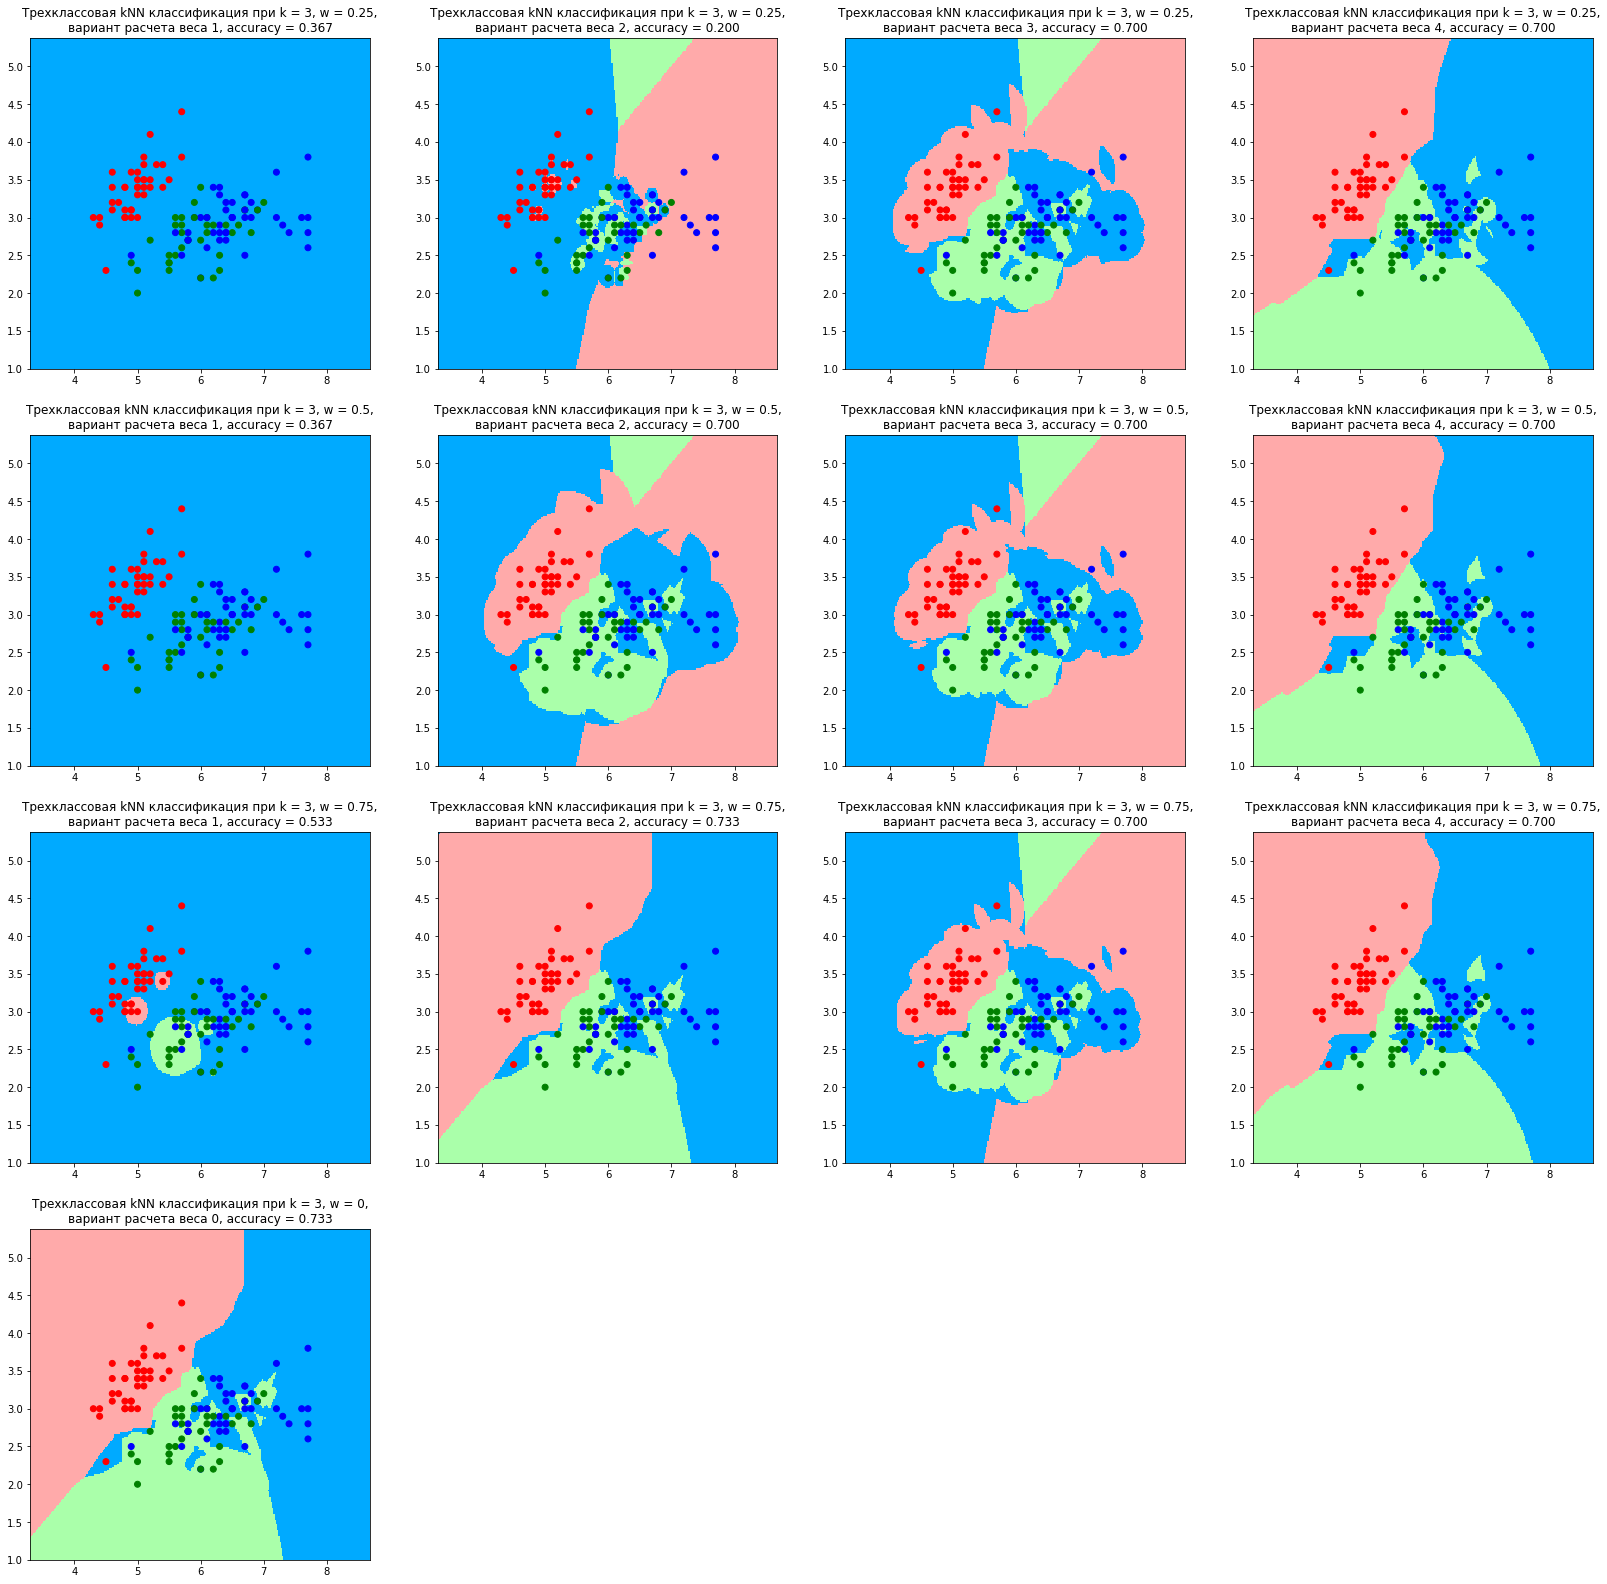

In [11]:
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cmap = ListedColormap(['red', 'green', 'blue'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
plt.figure(figsize = (28, 28))
count = 0
k = 3
for q in [0.25, 0.5, 0.75]:
    for weights_version in [1, 2, 3, 4]:
        count += 1
        predict = knn(X_train, y_train, X_test, k, q, weights_version)
        accur = accuracy(predict, y_test)
        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_version)
        Z = np.array(Z).reshape(xx.shape)
        plt.subplot(4,4,count)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {q},\nвариант расчета веса {weights_version}, accuracy = {accur:.3f}")
count += 1
predict = knn(X_train, y_train, X_test, k, 0, 0)
accur = accuracy(predict, y_test)
Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 0, 0)
Z = np.array(Z).reshape(xx.shape)
plt.subplot(4,4,count)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {0},\nвариант расчета веса {0}, accuracy = {accur:.3f}")
plt.show()

2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [12]:
from sklearn.datasets import make_blobs
import random

In [13]:
X, y = make_blobs(n_samples=500)

In [14]:
def kmeans(data, k, max_iterations, min_distance):
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        old_centroids = centroids.copy()
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
        if optimal:
            break
    return old_centroids, classes

In [15]:
def kmeans_quality(centroids, clusters):
    k=0
    quality=0
    for c in centroids:
        for x in clusters[k]:
            quality += e_metrics(x, c)**2
        k+=1
    return quality

In [16]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(7,7))
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.show()

In [17]:
max_iterations = 10
min_distance = 1e-4
k = 3

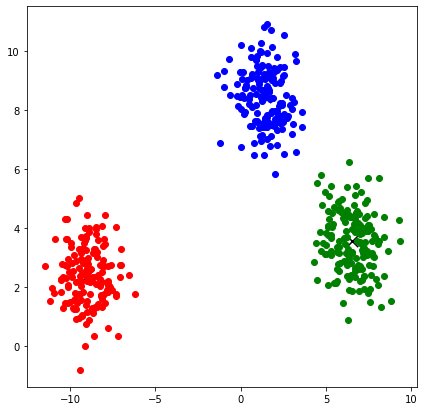

In [18]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [19]:
kmeans_q=[]
for k in range(1,11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    kmeans_q.append(kmeans_quality(centroids, clusters))

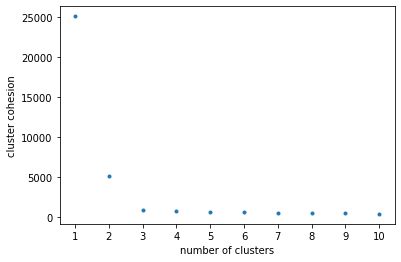

In [20]:
k=np.arange(10)
plt.xlabel('number of clusters')
plt.xticks(k+1)
plt.ylabel('cluster cohesion')
plt.plot(k+1,kmeans_q, '.')